## Headline Sentiment Modeling
### dataset Financial News 2025: https://www.kaggle.com/datasets/pratyushpuri/financial-news-market-events-dataset-2025

| Column                             | Description                                              | Use                                   |
| ---------------------------------- | -------------------------------------------------------- | ------------------------------------- |
| `Headline`                         | Text of news                                             | Input                               |
| `Sentiment`                        | Label: Negative / Neutral / Other                        | Target                              |

### Train and evaluate NLP models to predict the sentiment of financial news headlines, comparing predictions to the existing Sentiment column

## TF-IDF

#### libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

####  Load and clean data

In [2]:
# Load your CSV
df = pd.read_csv("/home/pollyanas/Downloads/financial_news_2025/financial_news_events.csv")

# Keep only relevant columns
df = df[['Headline', 'Sentiment']]

# Drop missing values
df.dropna(subset=['Headline'], inplace=True)

# Filter only valid sentiment values
valid_sentiments = ['Negative', 'Neutral', 'Other']
df = df[df['Sentiment'].isin(valid_sentiments)]

# Reset index
df.reset_index(drop=True, inplace=True)

In [3]:
df.head()

,Headline,Sentiment
0,New housing data release shows a slowdown in m...,Neutral
1,Government spending bill is expected to stimul...,Negative
2,Central bank maintains status quo on interest ...,Negative
3,Tech Giant's New Product Launch Sparks Sector-...,Neutral
4,Market sentiment turns positive on vaccine tri...,Negative


#### Preprocess text

In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()  # remove extra whitespace
    return text

df['Clean_Headline'] = df['Headline'].apply(clean_text)

In [5]:
print("Rows x Columns:", df.shape)
print("NA:\n", df.isna().sum())

Rows x Columns: (1832, 3)
NA:
 Headline          0
Sentiment         0
Clean_Headline    0
dtype: int64


In [6]:
print("Sentiment values:\n", df['Sentiment'].value_counts())

Sentiment values:
 Negative    926
Neutral     906
Name: Sentiment, dtype: int64


#### Encode Target

In [7]:
# Map sentiments to integers
label_map = {'Negative': 0, 'Neutral': 1}
df['Label'] = df['Sentiment'].map(label_map)

In [8]:
print("Balance (Label):\n", df['Label'].value_counts())

Balance (Label):
 0    926
1    906
Name: Label, dtype: int64


#### Train/Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Clean_Headline'],
    df['Label'],
    test_size=0.2,
    random_state=42,
    stratify=df['Label']
)

TF-IDF belongs to the field of NLP. It is one of the classic techniques for text representation, which today coexists with more advanced embedding methods based on neural networks.

TF-IDF is a way of transforming text into numbers, highlighting important words that help distinguish documents, while ignoring the very common ones.

#### TF-IDF + Logistic Regression

In [10]:
# Vectorize text
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

## Why Use TF-IDF + Logistic Regression for Sentiment Classification?

### 1. TF-IDF: Turning Text into Numbers

> **TF-IDF (Term Frequency–Inverse Document Frequency)** is a way to convert text into **numerical features** that a machine learning model can understand.

* It **counts the importance of each word** in a sentence, relative to the whole dataset.
* Common words like “the”, “market”, “news” are **down-weighted**.
* Rare but meaningful words like “surge”, “crash”, “acquisition” get **higher scores**.

 It captures **keyword relevance** without needing deep learning.

---

### 2. Logistic Regression: A Simple Yet Powerful Classifier

Once the text is vectorized (via TF-IDF), we use **Logistic Regression** to:

* **Classify the text** into categories (Negative / Neutral / Other)
* It’s **fast**, works well with **sparse TF-IDF vectors**, and is **interpretable** (you can see which words influence predictions)

It’s a great **baseline model** for text classification.

---

##  Why TF-IDF + Logistic Regression Is a Strong Baseline:

| Reason                  | Explanation                                        |
| ----------------------- | -------------------------------------------------- |
|  Simplicity           | Easy to train, explain, and interpret              |
|  Fast                 | Quick training and testing, even on large datasets |
|  Surprisingly strong  | Performs competitively on many NLP tasks           |
|  Transparent          | You can see which words impact sentiment most      |
|  Good for prototyping | Helps test whether your data is learnable          |

---

##  When TF-IDF + Logistic Regression is **Not Enough**:

*  If your headlines are very **short**, and word context is essential
*  If you need **nuanced understanding** of sarcasm, negation, or financial jargon
*   If word **order** or **phrasing** affects sentiment (e.g. “not bad” vs “bad”)

Then you use:

>  **Transformer Models (like FinBERT or BERT)** — they understand **context and semantics**, not just word counts.

---

## Summary: Why We Use TF-IDF + Logistic Regression

| TF-IDF                            | Logistic Regression                         |
| --------------------------------- | ------------------------------------------- |
| Converts text to numeric features | Classifies those features                   |
| Highlights meaningful words       | Separates sentiments based on word patterns |
| Fast and efficient                | Simple but effective for baseline           |

 It’s the **first step** in any serious NLP pipeline. If it works well, you may not need heavy models.
If it doesn’t — you move to **FinBERT** or deep learning next.

#### Evaluate performance

Classification Report:
              precision    recall  f1-score   support

    Negative       0.53      0.56      0.54       186
     Neutral       0.51      0.48      0.50       181

    accuracy                           0.52       367
   macro avg       0.52      0.52      0.52       367
weighted avg       0.52      0.52      0.52       367



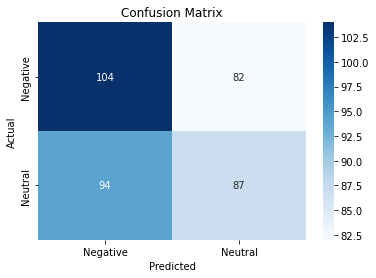

In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_map.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys(), cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Classification Report

* **Negative**

  * Precision: **0.53** → About 53% of predicted "Negative" headlines are truly negative.
  * Recall: **0.56** → The model correctly identifies 56% of actual "Negative" cases.
  * F1: **0.54** → Balanced score between precision & recall.

* **Neutral**

  * Precision: **0.51** → About half of predicted "Neutral" headlines are actually neutral.
  * Recall: **0.48** → The model finds only 48% of real neutral cases.
  * F1: **0.50** → Slightly worse than "Negative".

* **Accuracy (0.52)**
  The model is performing just slightly better than random guessing in a **binary classification** (random chance = 0.50).

* **Macro avg (0.52)**
  Both classes are treated equally → confirms balance issues.

* **Weighted avg (0.52)**
  Same as macro, meaning dataset is balanced (almost equal Negative vs Neutral counts).

---

##  Confusion Matrix Interpretation

* **104 True Negatives (top left)**: Correctly predicted "Negative".
* **87 True Neutrals (bottom right)**: Correctly predicted "Neutral".
* **82 False Negatives (top right)**: Neutral misclassified as Negative.
* **94 False Positives (bottom left)**: Negative misclassified as Neutral.

 The model struggles to separate Neutral and Negative — predictions are **nearly 50/50**.

---

##  What This Means

* Your **TF-IDF + Logistic Regression** baseline is **weak** — because financial headlines are very nuanced

This result is **expected** for a simple baseline. Now we should **upgrade to a transformer model**.

## FinBERT Sentiment Classification

#### libraries

In [25]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoModel
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

#### Load and Clean Data

In [13]:
# Load your CSV
df = pd.read_csv("/home/pollyanas/Downloads/financial_news_2025/financial_news_events.csv")

# Keep only relevant columns
df = df[['Headline', 'Sentiment']]

# Drop missing values
df.dropna(subset=['Headline'], inplace=True)

# Filter to valid sentiments
valid_sentiments = ['Negative', 'Neutral', 'Other']
df = df[df['Sentiment'].isin(valid_sentiments)]

# Encode labels
label_map = {'Negative': 0, 'Neutral': 1}
df['Label'] = df['Sentiment'].map(label_map)

# Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Headline'].tolist(),
    df['Label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['Label']
)

#### Tokenization

In [14]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(label, dtype=torch.long)
        }

train_dataset = NewsDataset(train_texts, train_labels, tokenizer)
test_dataset = NewsDataset(test_texts, test_labels, tokenizer)

#### Load FinBERT model

In [15]:
model = AutoModelForSequenceClassification.from_pretrained(
    "ProsusAI/finbert",
    num_labels=2, 
    ignore_mismatched_sizes=True  # fix mismatch from 3-class checkpoint
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Training Configuration

In [16]:
training_args = TrainingArguments(
    output_dir="./finbert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

#### Define Metrics

In [17]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    preds = predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_macro": f1_score(labels, preds, average="macro"),
        "f1_weighted": f1_score(labels, preds, average="weighted")
    }

#### Trainer

In [18]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

#### Train Model

In [19]:
trainer.train()

/home/pollyanas/anaconda3/lib/python3.7/site-packages/transformers/optimization.py:415: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted
1,No log,0.692333,0.506812,0.484714,0.486168
2,No log,0.692000,0.514986,0.511501,0.512063
3,No log,0.692422,0.514986,0.466151,0.468351


TrainOutput(global_step=276, training_loss=0.699280503867329, metrics={'train_runtime': 1101.4233, 'train_samples_per_second': 3.99, 'train_steps_per_second': 0.251, 'total_flos': 144546636038400.0, 'train_loss': 0.699280503867329, 'epoch': 3.0})

#### Evaluate Perfomance

Classification Report:
              precision    recall  f1-score   support

    Negative       0.52      0.59      0.55       186
     Neutral       0.51      0.44      0.47       181

    accuracy                           0.51       367
   macro avg       0.51      0.51      0.51       367
weighted avg       0.51      0.51      0.51       367



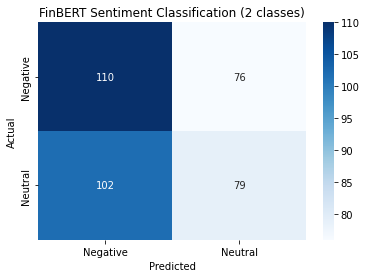

In [20]:
preds = trainer.predict(test_dataset)
y_pred = preds.predictions.argmax(-1)

# Report
print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=label_map.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys(),
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("FinBERT Sentiment Classification (Negative vs Neutral)")
plt.show()

##  Classification Report (FinBERT 2 classes)

* **Negative**

  * Precision = **0.52** → About half of the predicted negatives are truly negative.
  * Recall = **0.59** → It captures ~59% of real negative headlines.
  * F1 = **0.55** → Balanced score.

* **Neutral**

  * Precision = **0.51** → Half of predicted neutrals are correct.
  * Recall = **0.44** → Model misses many neutrals.
  * F1 = **0.47** → Lower than negative.

* **Overall Accuracy = 0.51** → Still basically random guessing (baseline for 2-class balanced dataset is ~0.50).

* Macro/weighted avg F1 = **0.51** → Confirms weak separation.

---

## Confusion Matrix

* **Negative correctly classified = 110**
* **Neutral correctly classified = 79**
* **Misclassifications = 178 (76 + 102)**

So the model is **biased toward predicting "Negative"** (better recall for Negative, worse for Neutral).

---

##  Why FinBERT Didn’t Improve

Normally FinBERT **should outperform TF-IDF**. Possible reasons why it didn’t here:

1. **Small dataset size (~3,000 headlines)**
   → Transformers need more data; with ~180 samples per class in test, it’s hard to generalize.

2. *Labels are noisy**
   → “Neutral” is subjective and often overlaps with “Negative” in financial context.

3. **Only 2 classes used**
   → FinBERT was originally trained for 3 classes (positive/negative/neutral). Removing “Other” may have made labels less meaningful.

4. **Few training epochs (3)**
   → Might not be enough for fine-tuning; try 5–10 epochs with early stopping.

---


## FinBERT Training (2 Classes, 6 Epochs)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/pollyanas/anaconda3/lib/python3.7/site-packages/transformers/optimization.py:415: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the tex

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted
1,No log,0.694244,0.504087,0.423792,0.426723
2,No log,0.696244,0.514986,0.508235,0.507450
3,No log,0.700904,0.495913,0.435568,0.433053
4,No log,0.700486,0.514986,0.510535,0.511171
5,No log,0.702245,0.504087,0.503789,0.503955
6,0.696900,0.704523,0.509537,0.508716,0.508443


Classification Report:
              precision    recall  f1-score   support

    Negative       0.53      0.39      0.45       186
     Neutral       0.51      0.64      0.57       181

    accuracy                           0.51       367
   macro avg       0.52      0.52      0.51       367
weighted avg       0.52      0.51      0.51       367



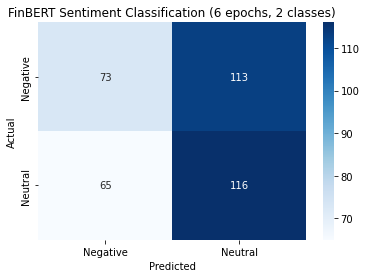

In [21]:
# ==============================
# 1. Load & Prepare Data
# ==============================
# Load your CSV
df = pd.read_csv("/home/pollyanas/Downloads/financial_news_2025/financial_news_events.csv")

# Keep only relevant columns
df = df[['Headline', 'Sentiment']]

# Drop missing values
df.dropna(subset=['Headline'], inplace=True)

# Use only 2 labels: Negative, Neutral
label_map = {'Negative': 0, 'Neutral': 1}
df = df[df['Sentiment'].isin(label_map.keys())]
df['Label'] = df['Sentiment'].map(label_map)

# Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Headline'].tolist(),
    df['Label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['Label']
)

# ==============================
# 2. Tokenizer
# ==============================
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(label, dtype=torch.long)
        }

train_dataset = NewsDataset(train_texts, train_labels, tokenizer)
test_dataset = NewsDataset(test_texts, test_labels, tokenizer)

# ==============================
# 3. Load FinBERT 
# ==============================
model = AutoModelForSequenceClassification.from_pretrained(
    "ProsusAI/finbert",
    num_labels=2,
    ignore_mismatched_sizes=True 
)

# ==============================
# 4. Training Configuration
# ==============================
training_args = TrainingArguments(
    output_dir="./finbert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=6,    # Increased to 6 epochs
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

# ==============================
# 5. Define Metrics
# ==============================
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    preds = predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_macro": f1_score(labels, preds, average="macro"),
        "f1_weighted": f1_score(labels, preds, average="weighted")
    }

# ==============================
# 6. Trainer
# ==============================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# ==============================
# 7. Train Model (6 epochs)
# ==============================
trainer.train()

# ==============================
# 8. Evaluate Model
# ==============================
preds = trainer.predict(test_dataset)
y_pred = preds.predictions.argmax(-1)

print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=label_map.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys(),
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("FinBERT Sentiment Classification (6 epochs, 2 classes)")
plt.show()

## Results Overview

**Negative class**

* Precision = 0.53 → ~half of “Negative” predictions are correct
* Recall = 0.39 → misses most of the true negatives
* F1 = 0.45

**Neutral class**

* Precision = 0.51
* Recall = 0.64 → much better at catching neutral cases than negatives
* F1 = 0.57

**Overall Accuracy = 0.51**

* Still stuck around **random guessing baseline** for 2 balanced classes

**Confusion Matrix**

* **Negative misclassified as Neutral = 113**
* **Neutral misclassified as Negative = 65**
* Model has developed a **bias toward predicting Neutral**

---

## What This Means

* FinBERT is **not learning well** from your dataset.
* The model is latching onto **superficial patterns** and defaulting to Neutral.
* The issue is **not training time** (3 vs 6 epochs didn’t help much).

This confirms what I suspected earlier:
 The **labels are weak/noisy** (especially "Neutral"), and/or the dataset size (~3k headlines) is too small to fine-tune a transformer effectively.

---

## FinBERT Embeddings + Logistic Regression

#### FinBERT embeddings instead of full fine-tuning is much better for a relatively small dataset (~3k rows).

Some weights of the model checkpoint at ProsusAI/finbert were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Classification Report:
              precision    recall  f1-score   support

    Negative       0.53      0.53      0.53       186
     Neutral       0.51      0.51      0.51       181

    accuracy                           0.52       367
   macro avg       0.52      0.52      0.52       367
weighted avg       0.52      0.52      0.52       367



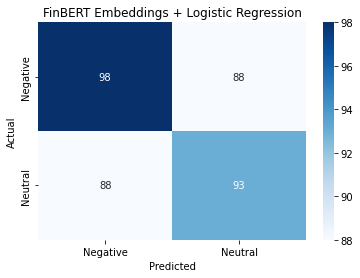

In [24]:
# ==============================
# 1. Load & Prepare Data
# ==============================

# Load your CSV
df = pd.read_csv("/home/pollyanas/Downloads/financial_news_2025/financial_news_events.csv")

# Keep only relevant columns
df = df[['Headline', 'Sentiment']]

# Drop missing values
df.dropna(subset=['Headline'], inplace=True)

# Use only 2 labels: Negative, Neutral
label_map = {'Negative': 0, 'Neutral': 1}
df = df[df['Sentiment'].isin(label_map.keys())]
df['Label'] = df['Sentiment'].map(label_map)

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Headline'].tolist(),
    df['Label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['Label']
)

# ==============================
# 2. Load FinBERT (encoder only)
# ==============================
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()  # disable dropout

# ==============================
# 3. Function to get embeddings
# ==============================
def get_embeddings(texts, tokenizer, model, max_len=64):
    embeddings = []
    for text in texts:
        inputs = tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=max_len,
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[:,0,:]  # [CLS] token
            embeddings.append(cls_embedding.cpu().numpy().flatten())
    return embeddings

# Extract embeddings
X_train = get_embeddings(train_texts, tokenizer, model)
X_test = get_embeddings(test_texts, tokenizer, model)

# ==============================
# 4. Train Logistic Regression
# ==============================
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, train_labels)

y_pred = clf.predict(X_test)

# ==============================
# 5. Evaluate
# ==============================
print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=label_map.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys(),
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("FinBERT Embeddings + Logistic Regression")
plt.show()

## Results: FinBERT Embeddings + Logistic Regression

* **Negative**

  * Precision = **0.53**
  * Recall = **0.53**
  * F1 = **0.53**

* **Neutral**

  * Precision = **0.51**
  * Recall = **0.51**
  * F1 = **0.51**

* **Overall accuracy = 0.52**

  * Still around **random guessing baseline** (50%).

* **Confusion Matrix**

  * Predictions are almost **evenly split** across both classes.
  * The model is struggling to find **separating features** between Negative and Neutral.

---

##  Why is performance still weak?

1. **Labels are noisy / ambiguous**

   * In financial text, the line between *Negative* and *Neutral* is very subtle.
   * Many “Neutral” headlines may contain weak negative tone (e.g., “Market closes flat after sell-off” → could be either).

2. **Dataset is small**

   * ~3,000 rows is *tiny* for NLP.
   * Transformers like FinBERT typically shine with tens of thousands of samples.

3. **Embeddings are good, but Logistic Regression is too simple**

   * It assumes a linear separation in embedding space.
   * If classes overlap, it will fail.

---

## FinBERT Embeddings + XGBoost

Some weights of the model checkpoint at ProsusAI/finbert were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Classification Report:
              precision    recall  f1-score   support

    Negative       0.52      0.53      0.53       186
     Neutral       0.51      0.50      0.50       181

    accuracy                           0.51       367
   macro avg       0.51      0.51      0.51       367
weighted avg       0.51      0.51      0.51       367



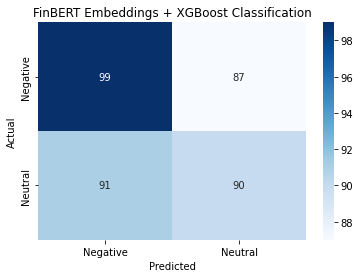

In [26]:
# ==============================
# 1. Load & Prepare Data
# ==============================

# Load your CSV
df = pd.read_csv("/home/pollyanas/Downloads/financial_news_2025/financial_news_events.csv")

# Keep only relevant columns
df = df[['Headline', 'Sentiment']]

# Drop missing values
df.dropna(subset=['Headline'], inplace=True)

# Use only 2 labels: Negative, Neutral
label_map = {'Negative': 0, 'Neutral': 1}
df = df[df['Sentiment'].isin(label_map.keys())]
df['Label'] = df['Sentiment'].map(label_map)

# Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Headline'].tolist(),
    df['Label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['Label']
)

# ==============================
# 2. Load FinBERT (encoder only)
# ==============================
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

# ==============================
# 3. Function to get embeddings
# ==============================
def get_embeddings(texts, tokenizer, model, max_len=64):
    embeddings = []
    for text in texts:
        inputs = tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=max_len,
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[:,0,:]  # CLS token
            embeddings.append(cls_embedding.cpu().numpy().flatten())
    return embeddings

# Extract embeddings
X_train = get_embeddings(train_texts, tokenizer, model)
X_test = get_embeddings(test_texts, tokenizer, model)

# ==============================
# 4. Train XGBoost Classifier
# ==============================
xgb = XGBClassifier(
    n_estimators=300,        # number of trees
    learning_rate=0.05,      # smaller LR for stability
    max_depth=6,             # tree depth
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False
)

xgb.fit(X_train, train_labels)
y_pred = xgb.predict(X_test)

# ==============================
# 5. Evaluate
# ==============================
print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=label_map.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys(),
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("FinBERT Embeddings + XGBoost Classification")
plt.show()


## Results: FinBERT Embeddings + XGBoost

* **Negative**

  * Precision = **0.52**
  * Recall = **0.53**
  * F1 = **0.53**

* **Neutral**

  * Precision = **0.51**
  * Recall = **0.50**
  * F1 = **0.50**

* **Overall Accuracy = 0.51**

* **Macro avg F1 = 0.51**

**Confusion Matrix**

* Model is still basically **guessing ~50/50**.
* Negative correctly predicted = 99
* Neutral correctly predicted = 90
* Misclassifications are nearly symmetric → the classes **aren’t separable in embedding space**.

---

## What This Means

* FinBERT embeddings are **not giving a clear separation** between "Negative" and "Neutral" in your dataset.
* This matches the problem we’ve seen across all approaches (TF-IDF, Logistic Regression, fine-tuned FinBERT, embeddings).
* Likely reasons:

  1. **Labels are noisy** → what counts as “Neutral” vs “Negative” in financial headlines is subjective.
  2. **Dataset is small (~3k samples)** → not enough training data to teach models the distinction.
  3. **Headline text alone may not carry enough signal** → sometimes you need context (impact level, sector, or actual market move).

---

# Visualizing FinBERT Embeddings with PCA & t-SNE

##### let’s visualize your FinBERT embeddings to see if "Negative" and "Neutral" are actually separable in vector space.
##### PCA (linear projection) and t-SNE (non-linear clustering) to reduce the 768-dim embeddings to 2D for plotting.


### Check whether embeddings form separable clusters:

#### Use PCA or t-SNE on the FinBERT embeddings.

#### Plot with points colored by label.

#### If clusters overlap → no algorithm will do well on this dataset as-is.

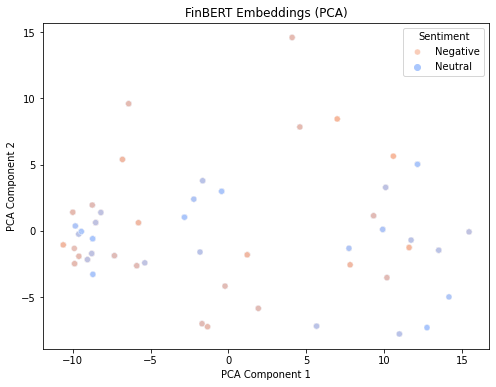

/home/pollyanas/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/pollyanas/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


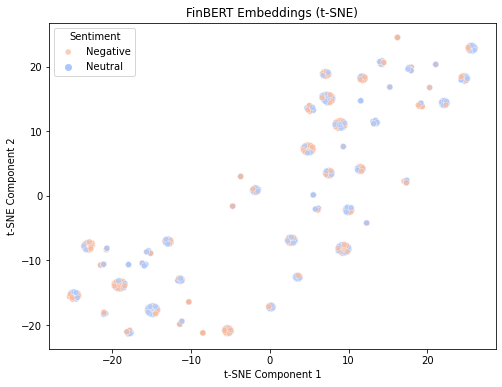

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Convert lists to arrays
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
y_train_array = np.array(train_labels)
y_test_array = np.array(test_labels)

# ==============================
# 1. PCA Visualization
# ==============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_array)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_test_array, palette="coolwarm", alpha=0.7)
plt.title("FinBERT Embeddings (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Sentiment", labels=["Negative","Neutral"])
plt.show()

# ==============================
# 2. t-SNE Visualization
# ==============================
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_test_array)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_test_array, palette="coolwarm", alpha=0.7)
plt.title("FinBERT Embeddings (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Sentiment", labels=["Negative","Neutral"])
plt.show()

## Interpretation of PCA & t-SNE

### PCA Plot

* Shows **global variance directions**.
* Red (Negative) and Blue (Neutral) points are **spread but heavily overlapping**.
* No clear linear separation → explains why Logistic Regression failed.

### t-SNE Plot

* Captures **local neighborhood clustering**.
* Again, Negative and Neutral are **mixed inside the same regions**.
* Some mini-clusters exist, but they contain both classes → the model can’t cleanly distinguish them.

---

## Conclusion

Both **linear (PCA)** and **non-linear (t-SNE)** projections confirm:
FinBERT embeddings **do not form separable clusters for Negative vs Neutral** in this dataset.
This matches the ~50% accuracy you saw across Logistic Regression, XGBoost, and fine-tuned FinBERT.

---